In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
bits = 128

In [3]:
data50 = np.loadtxt(f"maxwell_p{bits}_npts50.txt")
data100 = np.loadtxt(f"maxwell_p{bits}_npts100.txt")
data200 = np.loadtxt(f"maxwell_p{bits}_npts200.txt")
data400 = np.loadtxt(f"maxwell_p{bits}_npts400.txt")

Find the unique temperatures

In [4]:
Ts = sorted(list(set(data50[:, 0])))
Ts = Ts[::2]
Ts

[np.float64(10000.0),
 np.float64(1000000.0),
 np.float64(100000000.0),
 np.float64(10000000000.0)]

In [5]:
def sci_notation(num, precision=0):
    if num == 0:
        return "$0$"
    
    # Get scientific notation components
    fmt = f"{{:.{precision}e}}"
    mantissa_str, exp_str = fmt.format(num).split("e")
    mantissa = float(mantissa_str)
    exponent = int(exp_str)
    
    # Build LaTeX string
    if mantissa == 1:
        return rf"$10^{{{exponent}}}$"
    else:
        return rf"${mantissa} \times 10^{{{exponent}}}$"

In [6]:
fig = plt.figure(constrained_layout=True, figsize=(6, 12))

<Figure size 600x1200 with 0 Axes>

In [7]:
gs = mpl.gridspec.GridSpec(nrows=len(Ts), ncols=1, figure=fig)

In [8]:
icol = 3

In [9]:
if icol == 2:
    relation = r"$p = \rho^2 \partial e / \partial \rho |_T + T \partial p / \partial T |_\rho$"
elif icol == 3:
    relation = r"$\partial e / \partial T |_\rho = T \partial s / \partial T |_\rho$"
elif icol == 4:
    relation = r"$-\partial s /\partial \rho |_T = 1/\rho^2 \partial p / \partial T |_\rho$"

In [10]:
for n, T in enumerate(Ts):
    ax = fig.add_subplot(gs[n])
    idx = np.where(data50[:, 0] == Ts[n])
    ax.scatter(data50[idx, 1], data50[idx, icol], label="50 points", marker="x")
    ax.scatter(data100[idx, 1], data100[idx, icol], label="100 points", marker="x")
    ax.scatter(data200[idx, 1], data200[idx, icol], label="200 points", marker="x")
    ax.scatter(data400[idx, 1], data400[idx, icol], label="400 points", marker="x")

    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.text(0.02, 0.8, f"T = {sci_notation(T)} K", transform=ax.transAxes,
            fontsize="large",
            bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
    ax.grid(ls=":")
    if n < len(Ts)-1:
        ax.xaxis.set_ticklabels([])
    else:
        ax.set_xlabel(r"$\rho\ (\mathrm{g\ cm}^{-3})$")
    if n == 0:
        ax.legend()
fig.suptitle(relation)

Text(0.5, 0.98, '$\\partial e / \\partial T |_\\rho = T \\partial s / \\partial T |_\\rho$')

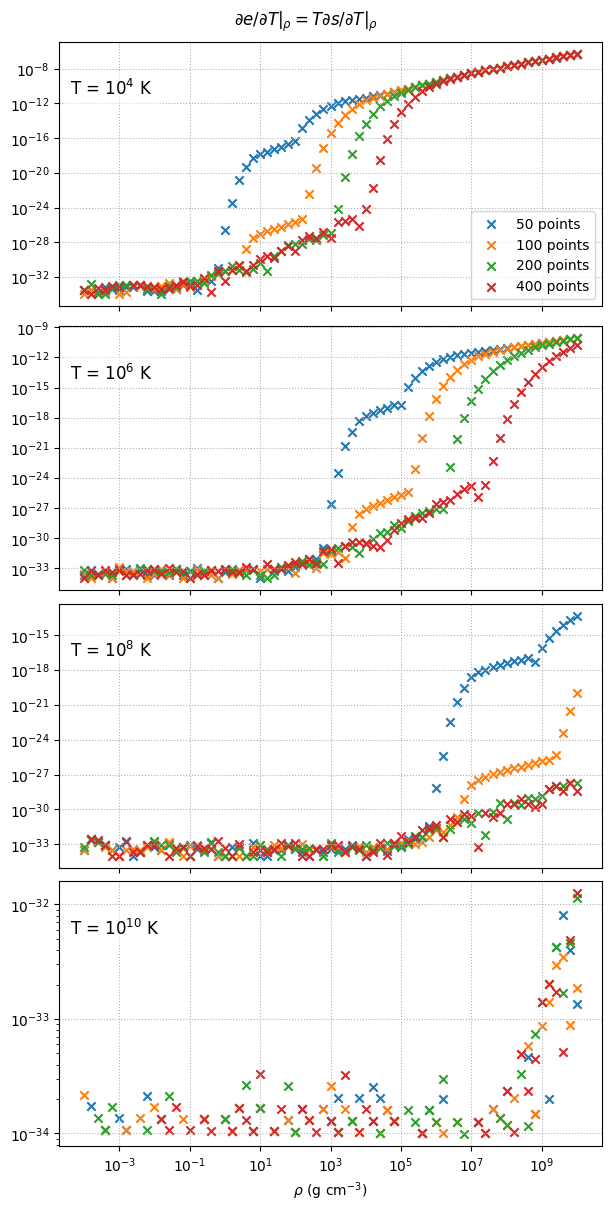

In [11]:
fig

In [12]:
fig.savefig(f"maxwell_{bits}bit.png")